In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def open_all_files(directory):
    try:
        press, enerdens, bardens = None, None, None
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            if os.path.isfile(filepath):
                print(f"Opening {filename}")
                if "Press_Final_PAR_" in filename:
                    press = pd.read_csv(
                        filepath, sep="\t", header=None, names=["mub", "T", "P"]
                    )
                elif "EnerDens_Final_" in filename:
                    enerdens = pd.read_csv(
                        filepath, sep="\t", header=None, names=["mub", "T", "e"]
                    )
                elif "BarDens_Final_" in filename:
                    bardens = pd.read_csv(
                        filepath, sep="\t", header=None, names=["mub", "T", "nb"]
                    )
                elif "inventer" in filename:
                    inv = pd.read_csv(
                        filepath,
                        sep="\s+",
                        skiprows=1,
                        names=["e", "nb", "Te", "Tnb", "mub_e", "mub_nb"],
                    )

        if not all([press is not None, enerdens is not None, bardens is not None]):
            raise ValueError("Missing required data files!")

        return press, enerdens, bardens, inv

    except Exception as e:
        print(f"Error: {e}")
        return None, None, None

In [14]:
directory = "/Users/tomaspolednicek/Desktop/EoS-script/data"  # Nastavte správnou cestu k souborům
press, enerdens, bardens, inv = open_all_files(directory)

Opening Press_Final_PAR_143_350_3_93_143_286_3D.dat
Opening EnerDens_Final_PAR_143_350_3_93_143_286_3D.dat
Opening EoS.dat
Opening chiraleos.dat
Opening inventer.dat
Opening CorrLength_Final_PAR_143_350_3_93_143_286_3D.dat
Opening SpSound_Final_PAR_143_350_3_93_143_286_3D.dat
Opening BarDens_Final_PAR_143_350_3_93_143_286_3D.dat
Opening Entr_Final_PAR_143_350_3_93_143_286_3D.dat
Opening Chi2_Final_PAR_143_350_3_93_143_286_3D.dat


<Figure size 640x480 with 0 Axes>

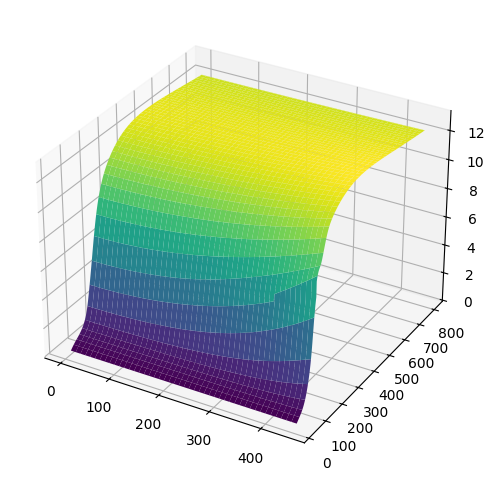

In [20]:
fig = plt.figure()


pivot = enerdens.pivot(index="mub", columns="T", values="e")
mub_values = pivot.index.values
T_values = pivot.columns.values
e_values = pivot.values

MUB, T = np.meshgrid(mub_values, T_values, indexing="ij")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(MUB, T, e_values, cmap="viridis")

# ax.set_xlabel("Mub")
# ax.set_ylabel("T")

ValueError: cannot reshape array of size 18 into shape (6,6)

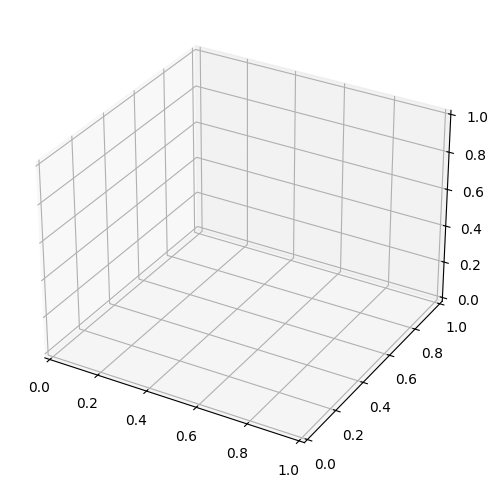

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Convert pandas Series to NumPy arrays
e = inv["e"].to_numpy()
nb = inv["nb"].to_numpy()
Te = inv["Te"].to_numpy()

# Create a 2D grid for interpolation
E, NB = np.meshgrid(
    np.linspace(e.min(), e.max(), 50), np.linspace(nb.min(), nb.max(), 50)
)

# Interpolate Te values to match the grid
Te_grid = griddata((e, nb), Te, (E, NB), method="cubic")

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot surface
ax.plot_surface(E, NB, Te_grid, cmap="viridis")

# Labels
ax.set_xlabel("e")
ax.set_ylabel("nb")
ax.set_zlabel("Te")
ax.set_title("3D Surface Plot of e, nb, and Te")

plt.show()

In [ ]:
N = 200000
min_e, max_e = -0.00999, 13.6
e_grid = [min_e + i * (max_e - min_e) / N for i in range(N)]

for i in e_grid:
    print(i)
    # Do something with i
    # e.g. calculate something, plot, etc.
    # For example, if you want to calculate the energy density:
    # energy_density = some_function(i)
    # print(energy_density)